## Classification Project
I used following Machine Learning Algorithms for classification
* **K Nearest Neighbors(KNN)**
* **LogisticRegressionCV**

## Data
* Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels. 


* **The data set contains the response metrics for 60 separate sonar frequencies** sent out against a known mine field and known rocks. These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine).


* **Goal** is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


* **Columns**:
  * There are 60 frequency columns
  * And "Label" column --> R = Rock and M = Mine
  

### Steps followed 

* Importing libraries and dataset
* Data Exploration
* Using "Pipeline" with KNN and LogisticRegressionCV models
* Using GridSearchCV with KNN
* Comparing Metrics for 3 models
* Using Principal Component Analysis --> Dimensionalty Reduction Technique

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/sonar.all-data.csv')

In [4]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df.shape

(208, 61)

In [6]:
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

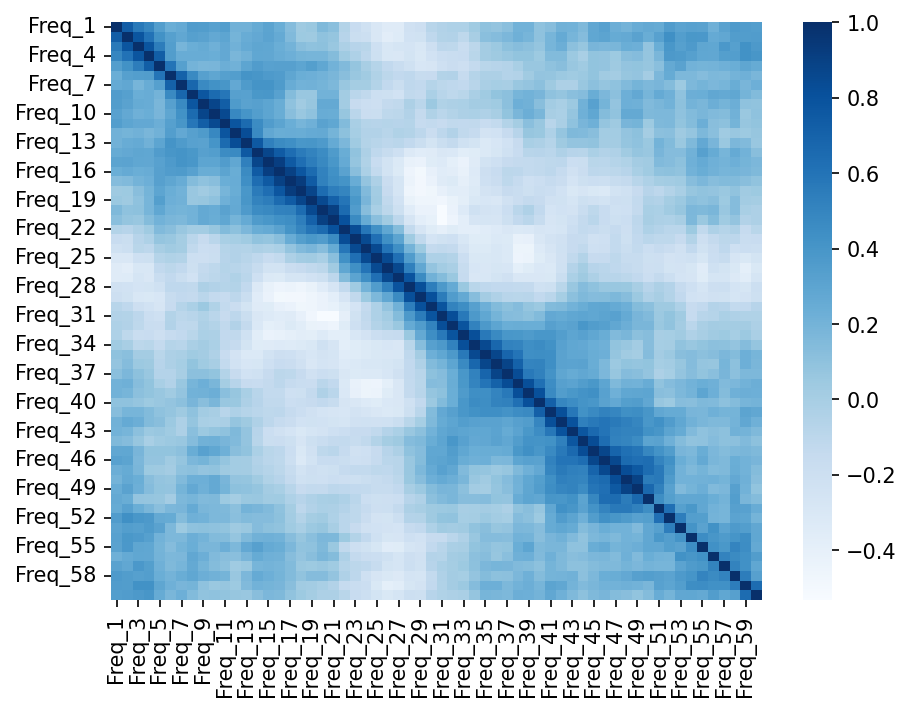

In [7]:
plt.figure(figsize=(7,5),dpi=150)
sns.heatmap(df.corr(),cmap='Blues')

In [8]:
df.isnull().sum()

Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64

There are no Missing values in our dataset

In [9]:
df['Label'].value_counts()

M    111
R     97
Name: Label, dtype: int64

In [10]:
# Replacing values in Label column with 0's and 1's
df['Label'].replace(to_replace=['M',"R"],value=[0,1],inplace=True)

In [11]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


* Class_0 --> Mine
* Class_1 --> Rock

#### Getting top 10 frequencies positively correlated with 'Label' column

In [12]:
df.corr()['Label'].sort_values(ascending=False)[1:10]

Freq_36    0.269151
Freq_35    0.227670
Freq_37    0.209055
Freq_34    0.172010
Freq_31    0.110728
Freq_33    0.107184
Freq_32    0.055275
Freq_38    0.040527
Freq_40    0.035928
Name: Label, dtype: float64

#### Getting top 10 frequencies negatively correlated with 'Label' column

In [13]:
df.corr()['Label'].sort_values(ascending=True)[:10]

Freq_11   -0.432855
Freq_12   -0.392245
Freq_49   -0.351312
Freq_10   -0.341142
Freq_45   -0.339406
Freq_48   -0.329333
Freq_9    -0.321448
Freq_13   -0.312811
Freq_46   -0.305610
Freq_47   -0.301697
Name: Label, dtype: float64

#### Importing all useful fuctions from Scikit Learn library

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

### Train-Test Split

In [15]:
X = df.drop('Label',axis=1)

In [16]:
y = df['Label'] 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

In [18]:
# Checking Shape of X_train
X_train.shape

(156, 60)

In [19]:
# Checking shape of X_test
X_test.shape

(52, 60)

### K Nearest Neighbors(KNN) Model
* This algorithm classifies a new data point based on distance between new data point and pre-labeled data points.
* One of the main parameter for this algorithm is K i.e Number of nearest data points to consider.
* Choosing a best K value is necessary

#### Finding error in model for different K values

* Error of a model = 1 - Accuracy Score of that model

In [20]:
errors = [] 
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
for k in range(1,31): 
    knn_model = KNeighborsClassifier(n_neighbors=k) 
    knn_model.fit(scaled_X_train,y_train) 
    y_pred = knn_model.predict(scaled_X_test) 
    err = 1 - accuracy_score(y_test,y_pred) 
    errors.append(err)    

In [21]:
# errors

Text(0, 0.5, 'Error Rate')

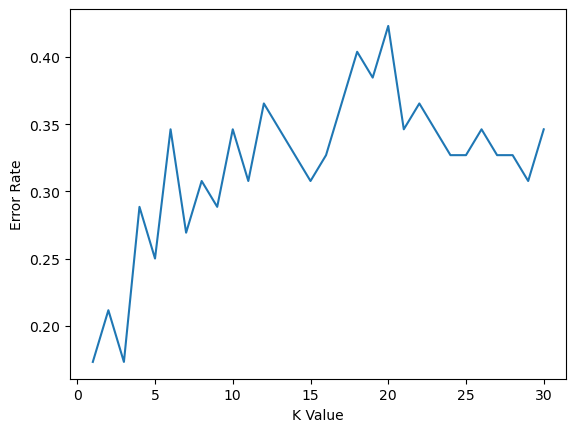

In [22]:
plt.plot(range(1,31),errors) 
plt.xlabel('K Value') 
plt.ylabel("Error Rate")

From above output,We can say that
* As K value increases error is also increasing
* So,choosing a small value for K is better

### KNN Model + Pipeline

In [23]:
# Creating a KNN model with number of nearest neighbors to consider(while classifying a new data point) as 1
knn_model1 = KNeighborsClassifier(n_neighbors=1)

**Creating a list of tuples for PIPELINE in that,**
* tuple denotes (name,transform),,where name is given by us,and transform is the operation that should be applied on the data
* Also,last tuple in the list should be an object of a machine learing algorithm(estimator)

In [24]:
operations_list1 = [('scaler',scaler),('knn_model1',knn_model1)]
# Here in the list,,First transform is Scaler Which scales the data to mean 0 and variance 1
# Last tuple in list is knn_model

In [25]:
# Passing the operations_list1 as steps in Pipeline
knn_pipe = Pipeline(steps=operations_list1)

In [26]:
# Fitting the model
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_model1', KNeighborsClassifier(n_neighbors=1))])

In [27]:
# Making Predictions
knn_pipe_preds = knn_pipe.predict(X_test)

In [28]:
# Getting confusion matrix as an array
confusion_matrix(y_test,knn_pipe_preds)

array([[22,  1],
       [ 8, 21]])

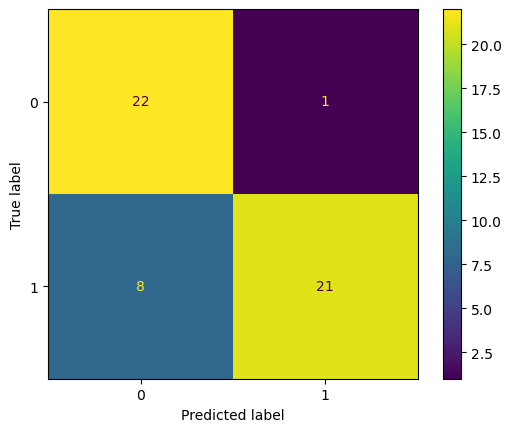

In [29]:
plot_confusion_matrix(knn_pipe,X_test,y_test)

From above output,We can say that
* Our test size is 52,among that knn_model1 did predicted
  * 43 correct predictions (22 True Positives and 21 True Negatives)
  * 9 incorrect predictions (1 False Positive and 8 False Negatives)

In [30]:
print(classification_report(y_test,knn_pipe_preds))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        23
           1       0.95      0.72      0.82        29

    accuracy                           0.83        52
   macro avg       0.84      0.84      0.83        52
weighted avg       0.86      0.83      0.83        52



In [31]:
print('\033[1m'+'Accuracy of KNN model with n_neighbors 1 is',accuracy_score(y_test,knn_pipe_preds))

Accuracy of KNN model with n_neighbors 1 is 0.8269230769230769


### Precision-Recall Curve

In [32]:
import scikitplot as skplt

In [33]:
probabs1 = knn_pipe.predict_proba(X_test)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

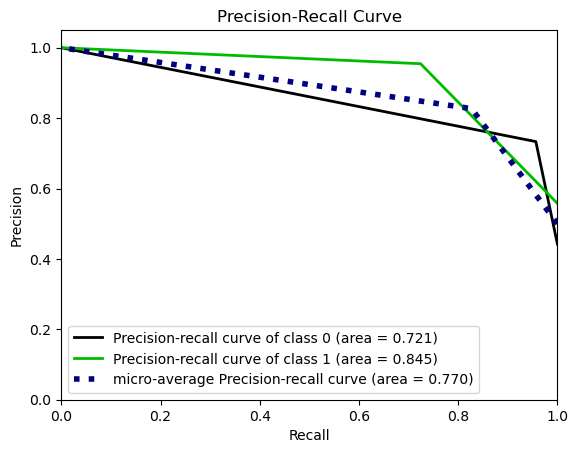

In [34]:
skplt.metrics.plot_precision_recall_curve(y_test,probabs1)

### ROC Curve

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

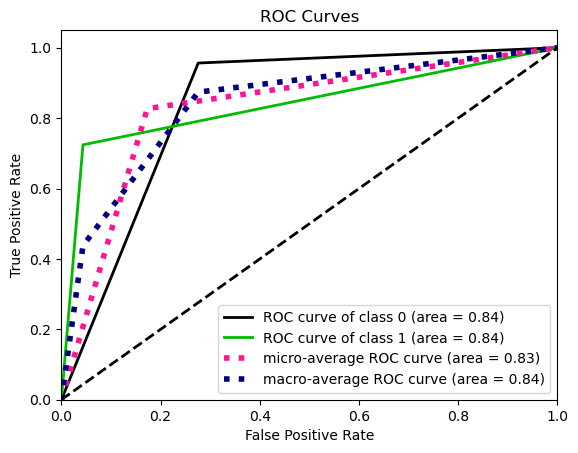

In [35]:
skplt.metrics.plot_roc_curve(y_test,probabs1)

### GridSearchCV + Pipeline 

In [36]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [37]:
operations_list2 = [('scaler',scaler),('knn',knn)]

In [38]:
pipe = Pipeline(steps=operations_list2)

In [39]:
# Creating a list of K Values
K_values = list(range(2,31))

# Creating parameter grid for GridSearchCV
params_grid = {'knn__n_neighbors':K_values}

In [40]:
# Passing Pipeline object as estimator in GridSearchCV
grid_KNN_model = GridSearchCV(pipe,param_grid=params_grid,scoring='accuracy',cv=5)

In [41]:
# Fitting the model
grid_KNN_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [42]:
# Getting the best estimator and parameters
grid_KNN_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

* GridSearchCV choose n_neighbors value as 3 

In [43]:
# Getting predictions from model
grid_KNN_pred = grid_KNN_model.predict(X_test)

In [44]:
# Getting the confusion matrix as an array
confusion_matrix(y_test,grid_KNN_pred)

array([[21,  2],
       [ 7, 22]])

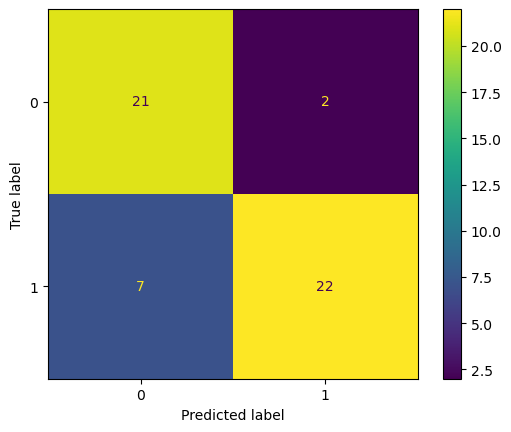

In [45]:
plot_confusion_matrix(grid_KNN_model,X_test,y_test)

From above output,We can say that
* Our test size is 52,among that KNN GridSearchCV model did predicted
  * 43 correct predictions (21 True Positives and 22 True Negatives)
  * 9 incorrect predictions (2 False Positive and 7 False Negatives)

In [46]:
print(classification_report(y_test,grid_KNN_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        23
           1       0.92      0.76      0.83        29

    accuracy                           0.83        52
   macro avg       0.83      0.84      0.83        52
weighted avg       0.84      0.83      0.83        52



In [47]:
print('\033[1m'+'Accuracy of KNN GridSearchCV model with n_neighbors 3 is',accuracy_score(y_test,grid_KNN_pred))

Accuracy of KNN GridSearchCV model with n_neighbors 3 is 0.8269230769230769


In [48]:
probabs2 = grid_KNN_model.predict_proba(X_test)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

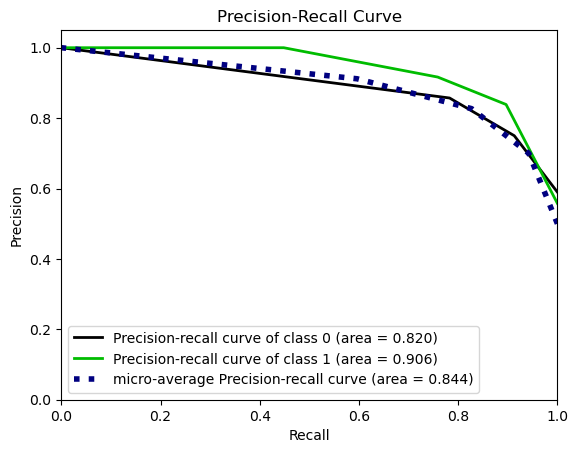

In [49]:
skplt.metrics.plot_precision_recall_curve(y_test,probabs2)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

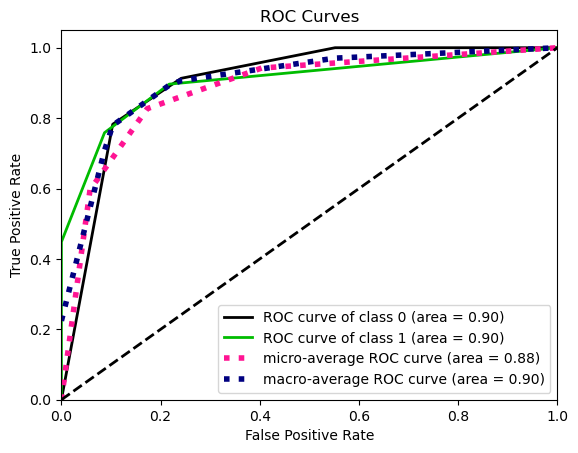

In [50]:
skplt.metrics.plot_roc_curve(y_test,probabs2)

### Logistic RegressionCV + Pipeline

In [51]:
scaler = StandardScaler()
log_cv_model = LogisticRegressionCV()

In [52]:
# Creating the steps which have to be performed by Pipeline
operations_list3 = [('scaler',scaler),('log_cv_model',log_cv_model)]

In [53]:
# Passing the operations_list3 as steps in Pipeline
log_cv_pipe = Pipeline(steps=operations_list3)

In [54]:
# Fitting the model
log_cv_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_cv_model', LogisticRegressionCV())])

In [55]:
log_cv_pred = log_cv_pipe.predict(X_test)

In [56]:
confusion_matrix(y_test,log_cv_pred)

array([[19,  4],
       [ 8, 21]])

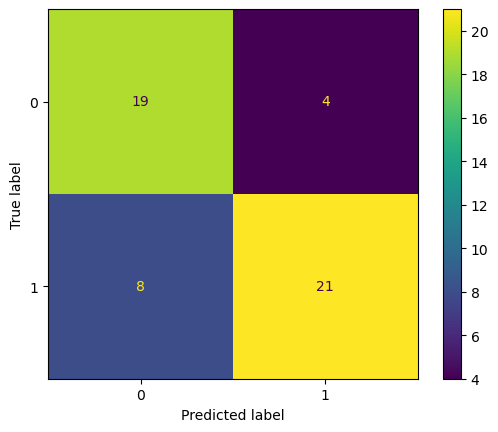

In [57]:
plot_confusion_matrix(log_cv_pipe,X_test,y_test)

From above output,We can say that
* Our test size is 52,among that LogisticRegressionCV model did predicted
  * 40 correct predictions (19 True Positives and 21 True Negatives)
  * 12 incorrect predictions (4 False Positive and 8 False Negatives)

In [58]:
print(classification_report(y_test,log_cv_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        23
           1       0.84      0.72      0.78        29

    accuracy                           0.77        52
   macro avg       0.77      0.78      0.77        52
weighted avg       0.78      0.77      0.77        52



In [59]:
print('\033[1m'+'Accuracy of LogisticRegressionCV model is',accuracy_score(y_test,log_cv_pred))

Accuracy of LogisticRegressionCV model is 0.7692307692307693


In [60]:
probabs3 = log_cv_pipe.predict_proba(X_test)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

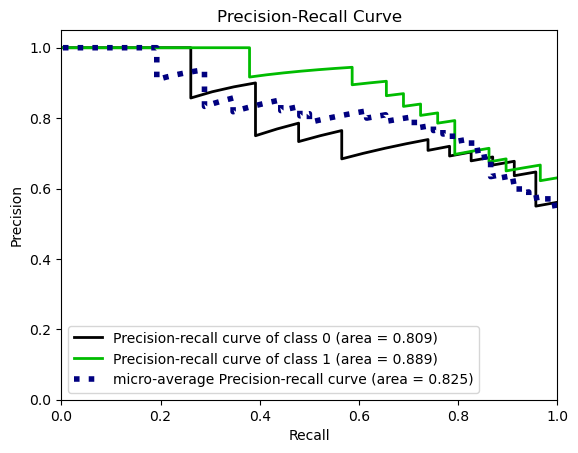

In [61]:
skplt.metrics.plot_precision_recall_curve(y_test,probabs3)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

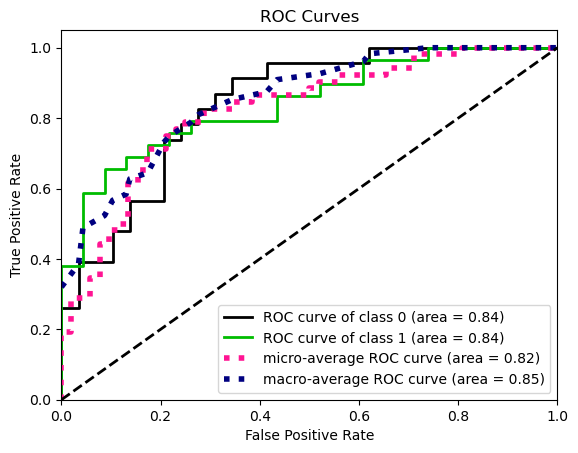

In [62]:
skplt.metrics.plot_roc_curve(y_test,probabs3)

### Comparing the metrics

In [63]:
metric_df = pd.DataFrame({'Model_Name':['KNN(K=1)','KNN(K=3)','LogisticRegressionCV'],
                         'Accuracy_Score':[0.8269,0.8269,0.7692],
                         'Total_Test_correct_predictions':[43,43,40],
                         'Total_Test_incorrect_predictions':[9,9,12],
                         'PR_Curve_Area_class_0':[0.72,0.82,0.80],
                         'PR_Curve_Area_class_1':[0.84,0.90,0.88],
                         'ROC_Curve_Area_class_0':[0.84,0.9,0.84],
                         'ROC_Curve_Area_class_1':[0.84,0.9,0.84]
                         })

In [64]:
metric_df.set_index("Model_Name")

,Accuracy_Score,Total_Test_correct_predictions,Total_Test_incorrect_predictions,PR_Curve_Area_class_0,PR_Curve_Area_class_1,ROC_Curve_Area_class_0,ROC_Curve_Area_class_1
Model_Name,,,,,,,
KNN(K=1),0.8269,43,9,0.72,0.84,0.84,0.84
KNN(K=3),0.8269,43,9,0.82,0.90,0.90,0.90
LogisticRegressionCV,0.7692,40,12,0.80,0.88,0.84,0.84


**Finally**
* Choosing KNN model with K = 3 is a better choice.

### Principal Component Analysis(PCA) - Dimensionality Reduction Technique
* Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components.
* By using those Principal Components,we can train Machine Learning Model.

In [65]:
from sklearn.decomposition import PCA

In [66]:
# Scaling is necessary for PCA
scaled_X = scaler.fit_transform(X)

In [67]:
scaled_X.shape

(208, 60)

In [68]:
pca = PCA(n_components=10)

In [69]:
principal_components = pca.fit_transform(scaled_X)

In [70]:
pca.components_.shape

(10, 60)

In [71]:
pca.explained_variance_ratio_

array([0.20346557, 0.18897216, 0.08549989, 0.0567919 , 0.0500708 ,
       0.04064995, 0.03278992, 0.03046466, 0.02565961, 0.02491102])

In [72]:
np.sum(pca.explained_variance_ratio_)

0.7392754799545409

From above output,We can say that
* Those 10 Principal Components are able to explain 73% variance in dataset

In [73]:
principal_components.shape

(208, 10)

In [74]:
pc_df = pd.DataFrame(principal_components)

In [75]:
pc_df

,0,1,2,3,4,5,6,7,8,9
0,1.921168,-1.370893,-1.666476,0.837913,-1.057324,1.712504,1.785716,-1.581264,0.335418,-1.028065
1,-0.480125,7.586388,-1.275734,3.859346,2.121112,-2.186818,-1.742764,1.517061,0.307933,-1.341882
2,3.859228,6.439860,-0.030635,5.454599,1.552060,1.181619,-1.820138,-1.495929,-1.152459,-1.006030
3,4.597419,-3.104089,-1.785344,-1.115908,-2.785528,-2.072673,2.084530,1.707289,0.452390,-1.117318
4,-0.533868,1.849847,-0.860097,3.302076,2.808954,-0.783945,0.362657,0.812621,0.184578,-0.023594
...,...,...,...,...,...,...,...,...,...,...
203,-1.207653,-0.968174,3.116148,-0.212490,2.306835,1.151569,0.010206,-1.606494,0.587992,-2.089473
204,-2.971439,-2.753492,2.500966,0.478754,2.157206,0.928558,-0.738412,-0.105210,-0.748383,-0.255461
205,-2.293210,-2.755446,2.388467,0.130616,2.759021,1.049497,-0.449578,-1.619202,0.317789,-0.394252
206,-3.114464,-1.850550,2.420486,0.382211,1.658317,0.917819,1.078272,-0.364099,0.536476,0.457437


### Train-Test Split

In [76]:
PC_X_train, PC_X_test, PC_y_train, PC_y_test = train_test_split(pc_df, y, test_size=0.25, random_state=31)

In [77]:
# Creating KNN Model
knn = KNeighborsClassifier(n_neighbors=3)

In [78]:
# Fitting the model with those Principal Components data
knn.fit(PC_X_train,PC_y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
# Checking Accuracy
accuracy_score(PC_y_test,knn.predict(PC_X_test))

0.8076923076923077

* By using those 10 principal components KNN model predicted 80% accurately.

**Plotting Variance Explained with respect to number of principal components**

In [80]:
variance_explained = []
for n in range(1,61):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    variance_explained.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 0, 'Number of Principal Components')

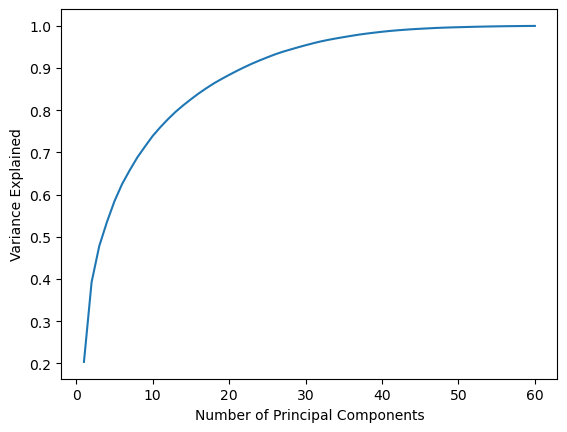

In [81]:
plt.plot(range(1,61),variance_explained)
plt.ylabel('Variance Explained')
plt.xlabel('Number of Principal Components')

From above output we can say that,
* Nearly 50 principal components are able to cover complete variance in dataset